Import Libraries

In [1]:
import pandas as pd
import numpy as np
#Librarie Visualization Data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#Libraries Of Modeling Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
#Libraries Of Data Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('/content/SuperStore.csv')
df.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


Exploratory Data Analayst (EDA)

In [3]:
values_to_remove = ['Tables', 'Supplies', 'Bookcases']
df_filtered = df[~df['Sub-Category'].isin(values_to_remove)]
df_filtered

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.940,3,0.0,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.620,2,0.0,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.368,2,0.2,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
5,CA-2017-115812,BH-11710,90032,FUR-FU-10001487,48.860,7,0.0,14.1694,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,6/9/2017,6/14/2017,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West
6,CA-2017-115812,BH-11710,90032,OFF-AR-10002833,7.280,4,0.0,1.9656,Office Supplies,Art,Newell 322,6/9/2017,6/14/2017,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-110422,TB-21400,33180,FUR-FU-10001889,25.248,3,0.2,4.1028,Furniture,Furnishings,Ultra Door Pull Handle,1/21/2017,1/23/2017,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South
9990,CA-2020-121258,DB-13060,92627,FUR-FU-10000747,91.960,2,0.0,15.6332,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9991,CA-2020-121258,DB-13060,92627,TEC-PH-10003645,258.576,2,0.2,19.3932,Technology,Phones,Aastra 57i VoIP phone,2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West
9992,CA-2020-121258,DB-13060,92627,OFF-PA-10004041,29.600,4,0.0,13.3200,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",2/26/2020,3/3/2020,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West


In [4]:
df.isnull().sum()

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9994 non-null   object 
 1   Customer_ID     9994 non-null   object 
 2   Postal_Code     9994 non-null   int64  
 3   Product_ID      9994 non-null   object 
 4   Sales           9994 non-null   float64
 5   Quantity        9994 non-null   int64  
 6   Discount        9994 non-null   float64
 7   Profit          9994 non-null   float64
 8   Category        9994 non-null   object 
 9   Sub-Category    9994 non-null   object 
 10  Product_Name    9994 non-null   object 
 11  Order_Date      9994 non-null   object 
 12  Ship_Date       9994 non-null   object 
 13  Ship_Mode       9994 non-null   object 
 14  Customer_Name   9994 non-null   object 
 15  Segment         9994 non-null   object 
 16  Country/Region  9994 non-null   object 
 17  City            9994 non-null   o

In [6]:
df_filtered['Sub-Category'].unique()

array(['Chairs', 'Labels', 'Storage', 'Furnishings', 'Art', 'Phones',
       'Binders', 'Appliances', 'Paper', 'Accessories', 'Envelopes',
       'Fasteners', 'Machines', 'Copiers'], dtype=object)

In [7]:
filt = df_filtered.groupby(by='Sub-Category').agg({'Profit':'sum'}).sort_values('Sub-Category',ascending=False)
filt

,Profit
Sub-Category,
Storage,21278.8264
Phones,44515.7306
Paper,34053.5693
Machines,3384.7569
Labels,5546.2540
Furnishings,13059.1436
Fasteners,949.5182
Envelopes,6964.1767
Copiers,55617.8249


Text(0.5, 1.0, 'Sub-Category by Sales & Profit')

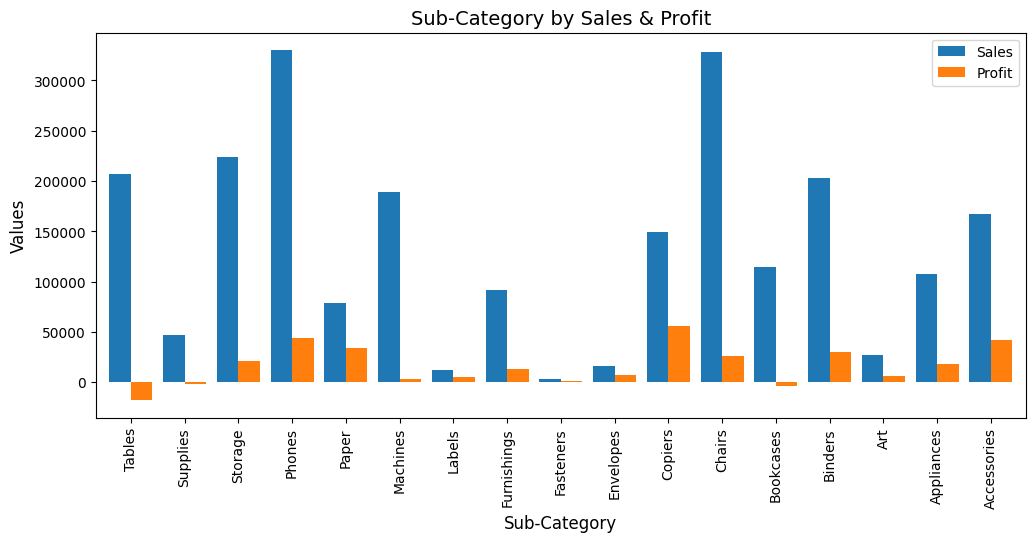

In [8]:
sal = df.groupby(by='Sub-Category').agg({'Sales': 'sum','Profit':'sum'}).sort_values('Sub-Category',ascending=False)
plot =sal.plot(kind='bar',width=0.8, figsize=(12,5))

plot.set_xlabel('Sub-Category', fontsize=12)
plot.set_ylabel('Values', fontsize=12)
plot.set_title('Sub-Category by Sales & Profit', fontsize=14)

In [9]:
df.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371023,229.858001,3.789574,0.156203,28.656896
std,32063.704510,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df = df_filtered.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Postal_Code', 'Product_ID', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Category', 'Sub-Category',
       'Product_Name', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_Name',
       'Segment', 'Country/Region', 'City', 'State', 'Region'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9256 entries, 1 to 9993
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        9256 non-null   object 
 1   Customer_ID     9256 non-null   object 
 2   Postal_Code     9256 non-null   int64  
 3   Product_ID      9256 non-null   object 
 4   Sales           9256 non-null   float64
 5   Quantity        9256 non-null   int64  
 6   Discount        9256 non-null   float64
 7   Profit          9256 non-null   float64
 8   Category        9256 non-null   object 
 9   Sub-Category    9256 non-null   object 
 10  Product_Name    9256 non-null   object 
 11  Order_Date      9256 non-null   object 
 12  Ship_Date       9256 non-null   object 
 13  Ship_Mode       9256 non-null   object 
 14  Customer_Name   9256 non-null   object 
 15  Segment         9256 non-null   object 
 16  Country/Region  9256 non-null   object 
 17  City            9256 non-null   o

Data Visualization

In [14]:
sal

,Sales,Profit
Sub-Category,,
Tables,206965.5320,-17725.4811
Supplies,46673.5380,-1189.0995
Storage,223843.6080,21278.8264
Phones,330007.0540,44515.7306
Paper,78479.2060,34053.5693
Machines,189238.6310,3384.7569
Labels,12486.3120,5546.2540
Furnishings,91705.1640,13059.1436
Fasteners,3024.2800,949.5182


In [15]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [17]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [18]:
df['Ship_Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

Label Encoding

In [19]:
#Menggunakan 'df.copy' untuk membuat data asli tidak berubah (yang terubah adalah data salinan), untuk kembali ke data asli harus menetapkan df ke 'df.copy'
df_filtered_copy = df_filtered.copy()
df_filtered_copy['Category'] = df_filtered_copy['Category'].map({'Furniture': 0, 'Office Supplies': 1, 'Technology': 2})
df_filtered_copy['Segment'] = df_filtered_copy['Segment'].map({'Consumer': 0, 'Corporate': 1, 'Home Office': 2})
df_filtered_copy['Region'] = df_filtered_copy['Region'].map({'South': 0, 'West': 1, 'Central': 2, 'East': 3})
df_filtered_copy['Ship_Mode'] = df_filtered_copy['Ship_Mode'].map({'Second Class': 0, 'Standard Class': 1, 'First Class': 2, 'Same Day': 3})

In [20]:
df_filtered_copy

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.940,3,0.0,219.5820,0,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",11/8/2019,11/11/2019,0,Claire Gute,0,United States,Henderson,Kentucky,0
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.620,2,0.0,6.8714,1,Labels,Self-Adhesive Address Labels for Typewriters b...,6/12/2019,6/16/2019,0,Darrin Van Huff,1,United States,Los Angeles,California,1
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.368,2,0.2,2.5164,1,Storage,Eldon Fold 'N Roll Cart System,10/11/2018,10/18/2018,1,Sean O'Donnell,0,United States,Fort Lauderdale,Florida,0
5,CA-2017-115812,BH-11710,90032,FUR-FU-10001487,48.860,7,0.0,14.1694,0,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,6/9/2017,6/14/2017,1,Brosina Hoffman,0,United States,Los Angeles,California,1
6,CA-2017-115812,BH-11710,90032,OFF-AR-10002833,7.280,4,0.0,1.9656,1,Art,Newell 322,6/9/2017,6/14/2017,1,Brosina Hoffman,0,United States,Los Angeles,California,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2017-110422,TB-21400,33180,FUR-FU-10001889,25.248,3,0.2,4.1028,0,Furnishings,Ultra Door Pull Handle,1/21/2017,1/23/2017,0,Tom Boeckenhauer,0,United States,Miami,Florida,0
9990,CA-2020-121258,DB-13060,92627,FUR-FU-10000747,91.960,2,0.0,15.6332,0,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,2/26/2020,3/3/2020,1,Dave Brooks,0,United States,Costa Mesa,California,1
9991,CA-2020-121258,DB-13060,92627,TEC-PH-10003645,258.576,2,0.2,19.3932,2,Phones,Aastra 57i VoIP phone,2/26/2020,3/3/2020,1,Dave Brooks,0,United States,Costa Mesa,California,1
9992,CA-2020-121258,DB-13060,92627,OFF-PA-10004041,29.600,4,0.0,13.3200,1,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",2/26/2020,3/3/2020,1,Dave Brooks,0,United States,Costa Mesa,California,1


In [21]:
#Change to dummies variable
X_dummies = pd.get_dummies(df_filtered[['Sub-Category','Discount']])

Making variable X & y

In [22]:
#Memisahkan Kolom Variabel dengan Target
X = df_filtered_copy[['Sales','Profit','Discount','Category','Segment','Region','Ship_Mode']]
y = df_filtered['Sub-Category']
print(X.shape, y.shape)

(9257, 7) (9257,)


Feature Selection

In [23]:
#Train Test Split dengan ratio 0.25 dan random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=0)
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (6942, 7) Y (6942,)
Data Test: X (2315, 7) Y (2315,)


Data Modeling and Evaluation

Modeling and Evaluation using Decision Tree Classifier

In [24]:
#Membuat model Decision Tree (random_state=0)
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [25]:
#Prediksi dataset training dan testing
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

In [26]:
#Melihat nilai akurasi dan classification report

#Akurasi dataset train
acc_train_dt = accuracy_score(y_train, y_pred_train_dt)
#Akurasi dataset test
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print('Decision Tree - Akurasi Training:', acc_train_dt)
print('Decision Tree - Akurasi Testing:', acc_test_dt)
print('Classification Report - Decision Tree:\n', classification_report(y_test, y_pred_test_dt))

Decision Tree - Akurasi Training: 0.9995678478824547
Decision Tree - Akurasi Testing: 0.6997840172786177
Classification Report - Decision Tree:
               precision    recall  f1-score   support

 Accessories       0.75      0.76      0.76       194
  Appliances       0.44      0.39      0.42       117
         Art       0.65      0.64      0.64       199
     Binders       0.72      0.78      0.75       381
      Chairs       0.86      0.82      0.84       154
     Copiers       0.59      0.59      0.59        17
   Envelopes       0.29      0.25      0.27        63
   Fasteners       0.30      0.31      0.31        54
 Furnishings       0.89      0.92      0.90       239
      Labels       0.46      0.44      0.45        91
    Machines       0.62      0.55      0.58        29
       Paper       0.67      0.67      0.67       343
      Phones       0.80      0.80      0.80       222
     Storage       0.74      0.69      0.72       212

    accuracy                           0.70

Modeling and Evaluation using Gradient Boosting Classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
#Model Gradient Boosting
gb= GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [28]:
#Model Gradient Boosting
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
#Analisis model gradient boosting
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

In [29]:
#Akurasi dataset train
acc_train_gb = accuracy_score(y_train, y_pred_train_gb)
#Akurasi dataset test
acc_test_gb = accuracy_score(y_test, y_pred_test_gb)

print('Gradient Boosting - Akurasi Training:', acc_train_gb)
print('Gradient Boosting - Akurasi Testing:', acc_test_gb)
print('Classification Report - Gradient Boosting:\n', classification_report(y_test, y_pred_test_gb))

Gradient Boosting - Akurasi Training: 0.8252664938058196
Gradient Boosting - Akurasi Testing: 0.7239740820734342
Classification Report - Gradient Boosting:
               precision    recall  f1-score   support

 Accessories       0.71      0.78      0.74       194
  Appliances       0.51      0.34      0.41       117
         Art       0.67      0.74      0.70       199
     Binders       0.77      0.78      0.77       381
      Chairs       0.89      0.82      0.86       154
     Copiers       0.71      0.59      0.65        17
   Envelopes       0.45      0.08      0.14        63
   Fasteners       0.52      0.30      0.38        54
 Furnishings       0.89      0.94      0.91       239
      Labels       0.66      0.49      0.57        91
    Machines       0.81      0.59      0.68        29
       Paper       0.61      0.80      0.69       343
      Phones       0.75      0.73      0.74       222
     Storage       0.75      0.75      0.75       212

    accuracy                   

Modeling and Evaluation using Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi model
RF = RandomForestClassifier(n_estimators=100, random_state=0)
# Melatih model pada data pelatihan
RF.fit(X_train, y_train)
# Melakukan prediksi
y_pred = RF.predict(X_test)
y_pred_train = RF.predict(X_train)

In [31]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

print("Accuracy : ", accuracy_score(y_test,y_pred)*100)

print("Report : ", classification_report(y_test, y_pred))

Confusion Matrix:  [[153   0   0   0   0   0   0   0   0   0   0   0  41   0]
 [  0  24  25  18   0   0   0   1   0   0   0  14   0  35]
 [  0  14 136   3   0   0   2   5   0   2   0  13   0  24]
 [  0   2   9 303   0   0   6   1   0  12   0  45   0   3]
 [  0   0   0   0 138   0   0   0  16   0   0   0   0   0]
 [  5   0   0   0   0   6   0   0   0   0   4   0   2   0]
 [  0   0   4  14   0   0   3   1   0   3   0  38   0   0]
 [  0   0  14   4   0   0   2   7   0   7   0  17   0   3]
 [  0   0   0   0  11   0   0   0 228   0   0   0   0   0]
 [  0   0   6  14   0   0   2   6   0  22   0  40   0   1]
 [  6   0   0   0   0   2   0   0   0   0  14   0   7   0]
 [  0   0   8  59   0   0  15   1   0  24   0 235   0   1]
 [ 51   0   0   0   0   2   0   0   0   0   1   0 168   0]
 [  0  18  34   1   0   0   0   3   0   0   0   2   0 154]]
Accuracy :  68.7257019438445
Report :                precision    recall  f1-score   support

 Accessories       0.71      0.79      0.75       194
  Appl